In [1]:
# IMPORT DEPENDENCIES
# FOR DATA
import pandas as pd
import os
import csv
import math
import numpy as np
import time
import datetime
# import requests
# import datefinder

# # FOR SQL LITE
# from sqlalchemy import create_engine
# from datetime import date

# # FOR PLOTTING
import matplotlib.pyplot as plt
from matplotlib import style
style.use("fivethirtyeight")
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 8

# FOR MODELING
from scipy.optimize import curve_fit
# from splinter import Browser
# from bs4 import BeautifulSoup as BS
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.datasets import make_blobs
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_classification

# LOAD MODEL

In [ ]:
import pickle
with open('NN_fireClassModel.pkl', 'rb') as f:
    fireClassModel = pickle.load(f)
    

In [ ]:
print(f"Test set score: {fireClassModel.score(X_test, y_test)}")

## DATA CLEAN UP AND REMOVE UNWANTED COLUMNS

In [936]:
# # Get dummy variables for nominal property column
# # idaho_Fire_Weather_df = pd.get_dummies(idaho_Fire_Weather_df, columns=["FIRE_SIZE_CLASS"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["CITY"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# # FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # # replace values in each column according to the dictionaries above
# # clean_fires_Idaho_2000_2015_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

In [937]:
# Get dummy variables for nominal property column
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["STAT_CAUSE_DESCR"])
# idaho_Fire_Weather_Drought_df = pd.get_dummies(idaho_Fire_Weather_Drought_df, columns=["NAME"])

# FIRE_SIZE_CLASS_NOS  = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5, 'F' : 6, 'G' : 7}

# # replace values in each column according to the dictionaries above
# idaho_Fire_Weather_Drought_df.replace({'FIRE_SIZE_CLASS': FIRE_SIZE_CLASS_NOS}, inplace=True) 
                    
# idaho_Fire_Weather_Drought_df.isnull().sum()

### Generate and associate cities using the lat lng coordinates

# MODELING

In [938]:
idaho_Fire_Weather_Drought_df

,Unnamed: 0,OBJECTID,Shape,Join_Count,TARGET_FID,FOD_ID,FPA_ID,SOURCE_SYSTEM_TYPE,SOURCE_SYSTEM,NWCG_REPORTING_AGENCY,...,DAY3,DAY4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
0,0,152,Point,1,152,155,FS-1419238,FED,FS-FIRESTAT,FS,...,2005-07-15,2005-07-16,0.5,0.0,0.0,0.0,77.00,69.08,69.98,71.06
1,1,169,Point,1,169,172,FS-1419278,FED,FS-FIRESTAT,FS,...,2005-07-01,2005-07-02,0.0,0.0,0.0,0.0,64.04,62.06,69.08,66.92
2,2,173,Point,1,173,176,FS-1419291,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
3,3,174,Point,1,174,177,FS-1419292,FED,FS-FIRESTAT,FS,...,2005-07-03,2005-07-04,0.0,0.0,0.0,0.0,69.08,66.92,64.04,64.94
4,4,175,Point,1,175,178,FS-1419293,FED,FS-FIRESTAT,FS,...,2005-07-06,2005-07-07,0.0,0.0,0.0,0.8,64.94,68.00,71.96,71.96
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15482,15482,1847559,Point,1,1847559,300274043,SFO-2015IDIDL2202015025,NONFED,ST-NASF,ST/C&L,...,2015-10-05,2015-10-06,1.3,0.0,0.0,0.0,60.26,58.28,48.92,49.64
15483,15483,1847684,Point,1,1847684,300274204,SFO-2015IDIDL2102015023,NONFED,ST-NASF,ST/C&L,...,2015-10-10,2015-10-11,0.2,0.0,0.9,0.0,58.28,60.08,66.74,59.36
15484,15484,1847710,Point,1,1847710,300274236,SFO-2015IDIDL2102015021,NONFED,ST-NASF,ST/C&L,...,2015-10-11,2015-10-12,0.0,0.9,0.0,0.0,60.08,66.74,59.36,50.00
15485,15485,1847762,Point,1,1847762,300274306,SFO-2015IDIDL9802015030,NONFED,ST-NASF,ST/C&L,...,2015-10-13,2015-10-14,0.0,0.0,0.0,0.0,67.28,58.46,61.52,63.68


In [939]:
# Get Avg for values
Day1_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].mean()
Day2_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].mean()
Day3_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].mean()
Day4_prcp = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].mean()
Day1_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].mean()
Day2_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].mean()
Day3_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].mean()
Day4_temp = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].mean()

# Use Avg values to fill any null values
idaho_Fire_Weather_Drought_df['DAY_PRCP_1'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_1'].fillna(Day1_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_2'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_2'].fillna(Day2_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_3'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_3'].fillna(Day3_prcp)
idaho_Fire_Weather_Drought_df['DAY_PRCP_4'] = idaho_Fire_Weather_Drought_df['DAY_PRCP_4'].fillna(Day4_prcp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_1'].fillna(Day1_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_2'].fillna(Day2_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_3'].fillna(Day3_temp)
idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'] = idaho_Fire_Weather_Drought_df['DAY_AVG_TEMP_4'].fillna(Day4_temp)

In [940]:
Corr_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'DISCOVERY_DATE_CONVERTED', 'FIRE_YEAR', 'STAT_CAUSE_DESCR', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# Corr_df = idaho_Fire_Weather_Drought_df[['NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
    
Corr_df['FIRE_SIZE_CLASS']= Corr_df['FIRE_SIZE_CLASS'].astype('category').cat.codes

Corr_df.corr()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


,FIRE_SIZE_CLASS,DISCOVERY_DATE_CONVERTED,FIRE_YEAR,AVE_SIZE12,CROP_ACR12,None,D0,D1,D2,D3,D4,DAY_PRCP_1,DAY_PRCP_2,DAY_PRCP_3,DAY_PRCP_4,DAY_AVG_TEMP_1,DAY_AVG_TEMP_2,DAY_AVG_TEMP_3,DAY_AVG_TEMP_4
FIRE_SIZE_CLASS,1.000000,-0.039485,-0.032507,0.160932,0.157311,-0.065962,0.066057,0.088865,0.034377,0.006644,-0.003103,-0.029500,-0.054438,-0.074597,-0.076990,0.012327,0.011437,0.043590,0.078059
DISCOVERY_DATE_CONVERTED,-0.039485,1.000000,-0.051657,0.027828,0.002336,-0.107652,0.106430,0.090870,0.134617,0.152003,0.044361,-0.028344,0.012246,0.028762,0.009134,-0.010255,-0.033419,-0.061273,-0.110434
FIRE_YEAR,-0.032507,-0.051657,1.000000,-0.140139,-0.188722,0.122336,-0.119810,-0.163571,-0.202830,-0.168943,-0.114602,0.033148,0.047487,0.026526,0.037010,0.111129,0.107039,0.100226,0.104179
AVE_SIZE12,0.160932,0.027828,-0.140139,1.000000,0.571380,-0.137073,0.131352,0.135573,0.091559,0.083473,0.046812,-0.006052,-0.018983,-0.006477,-0.013977,0.036630,0.044597,0.060058,0.059310
CROP_ACR12,0.157311,0.002336,-0.188722,0.571380,1.000000,-0.135187,0.135277,0.141688,0.108183,0.132088,0.102180,-0.004251,-0.023994,-0.031849,-0.012188,-0.050913,-0.056902,-0.044874,-0.022190
None,-0.065962,-0.107652,0.122336,-0.137073,-0.135187,1.000000,-0.995751,-0.723732,-0.472200,-0.248983,-0.087706,0.008517,-0.011360,-0.008045,0.009782,0.025653,0.039470,0.034612,0.032694
D0,0.066057,0.106430,-0.119810,0.131352,0.135277,-0.995751,1.000000,0.726378,0.473902,0.249879,0.088022,-0.008279,0.010693,0.007879,-0.008942,-0.024527,-0.037737,-0.033154,-0.031903
D1,0.088865,0.090870,-0.163571,0.135573,0.141688,-0.723732,0.726378,1.000000,0.703901,0.373141,0.131763,0.006715,0.008598,-0.006008,-0.033356,-0.023422,-0.035005,-0.027347,-0.015709
D2,0.034377,0.134617,-0.202830,0.091559,0.108183,-0.472200,0.473902,0.703901,1.000000,0.587261,0.211572,0.022861,0.010859,0.010129,-0.023274,-0.079071,-0.090207,-0.092614,-0.089342
D3,0.006644,0.152003,-0.168943,0.083473,0.132088,-0.248983,0.249879,0.373141,0.587261,1.000000,0.425661,-0.004332,-0.012214,-0.020633,-0.018498,-0.120081,-0.125164,-0.131088,-0.120926


## CREATING A NEURAL NETWORK MODELING

In [941]:
# # INVESTIGATING INPUTS
# # Possible X columns
# # [['DISCOVERY_DATE_CONVERTED', 'FIRE_SIZE_CLASS', 'AVE_FAM_SZ', 'NO_FARMS12', 'AVE_SIZE12', 'CROP_ACR12', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 
# #   'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# New_df = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'STAT_CAUSE_DESCR', 'DISCOVERY_DATE_CONVERTED', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
#                                    'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]
# New_df['FIRE_SIZE_CLASS']= New_df['FIRE_SIZE_CLASS'].astype('category').cat.codes
# # New_df['AVE_FAM_SZ']= New_df['AVE_FAM_SZ'].apply(lambda x: x//1)

# # Drop Y column
# New_df = New_df.drop(['FIRE_SIZE_CLASS'], axis=1)
# New_df = New_df.drop(['STAT_CAUSE_DESCR'], axis=1)

# # Run PCA 
# from sklearn.decomposition import PCA
# n_components=40
# pca = PCA(n_components=n_components)

# # Create multiple columns for County "NAME"
# New_df = pd.get_dummies(New_df, columns=['NAME'])
# # New_df = pd.get_dummies(New_df, columns=['STAT_CAUSE_DESCR'])

# NoOfCols = n_components

# X_Array = New_df.to_numpy()
# pca.fit(X_Array)
# # print(pca.singular_values_)
# x = pca.transform(X_Array)
# x
# # print(x.shape)
# # type(x)
# # x

# NoOfCols = n_components
# NoOfRuns = 2000

In [942]:
# CREATE X VALUES
# X by Keep
X = idaho_Fire_Weather_Drought_df[['FIRE_SIZE_CLASS', 'DISCOVERY_DATE_CONVERTED', 'NAME', 'None', 'D0','D1', 'D2', 'D3', 'D4', 
                                   'DAY_PRCP_1', 'DAY_PRCP_2', 'DAY_PRCP_3', 'DAY_PRCP_4', 'DAY_AVG_TEMP_1', 'DAY_AVG_TEMP_2', 'DAY_AVG_TEMP_3', 'DAY_AVG_TEMP_4']]

# Either Or
X = X.drop(['FIRE_SIZE_CLASS'], axis=1)
# X = pd.get_dummies(X, columns=['FIRE_SIZE_CLASS'])
X = pd.get_dummies(X, columns=['NAME'])

NoOfCols = 69
NoOfRuns = 1000
X = X.values.reshape(-1, NoOfCols)

# X = X.to_numpy()

print(X.shape)
type(X)
# X

(15487, 69)


numpy.ndarray

In [943]:
# CREATE y VALUES
y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR']]

# y = idaho_Fire_Weather_Drought_df[['STAT_CAUSE_DESCR', 'FIRE_SIZE_CLASS']]
# y = pd.get_dummies(y, columns=["STAT_CAUSE_DESCR"])

# y = y.values.reshape(-1, 2)

# print(y.shape)
# # type(y)
# y

# LABEL ENCODE Y
# Import required module
from sklearn.preprocessing import LabelEncoder

# LabelEncoder
le = LabelEncoder()

# Create an object of the label encoder class
labelencoder = LabelEncoder()

# apply "le.fit_transform"
old_y = y.apply(le.fit_transform)
y = old_y

# # Change the shape of y v1
new_y = np.array(old_y)
y = new_y.reshape(-1, 1) 
print(y.shape)
y

(15487, 1)


array([[7],
       [1],
       [1],
       ...,
       [7],
       [7],
       [7]])

## TEST AND TRIAN SPLITS

In [944]:
# Split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [945]:
# # Scale your data
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)
# # y_scaler = StandardScaler().fit(y_train)

# # Create variables to hold the scaled train & test data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
# # y_train_scaled = y_scaler.transform(y_train)
# # y_test_scaled = y_scaler.transform(y_test)

print(X_train_scaled.shape)

(11615, 69)


In [946]:
### Encode the categorical target variable to the necessary format for the model
from keras.utils import to_categorical

# One-hot encoding
y_train_categorical = to_categorical(y_train)
y_test_categorical = to_categorical(y_test)

### Create 2 neural network models to test

In [947]:
# X Inputs
X_train.shape

(11615, 69)

In [948]:
# X Inputs
print(X_train.shape)
print(X_train_scaled.shape)

# Y Inputs
print(y_train_categorical.shape)

(11615, 69)
(11615, 69)
(11615, 13)


In [949]:
# Normal neural network with X inputs, 1 hidden layer, 10 nodes in hidden layer, and 7 outputs
from keras.models import Sequential
from keras.layers import Dense, Dropout

fire_cause_model_v1 = Sequential()
fire_cause_model_v1.add(Dense(units=20, activation='sigmoid', input_dim=NoOfCols))
fire_cause_model_v1.add(Dense(128, activation='relu'))
fire_cause_model_v1.add(Dropout(.1))
fire_cause_model_v1.add(Dense(128, activation='relu'))
fire_cause_model_v1.add(Dense(units=13, activation='softmax'))

# view the model's architecture
fire_cause_model_v1.summary()

Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_326 (Dense)            (None, 20)                1400      
_________________________________________________________________
dense_327 (Dense)            (None, 128)               2688      
_________________________________________________________________
dropout_40 (Dropout)         (None, 128)               0         
_________________________________________________________________
dense_328 (Dense)            (None, 128)               16512     
_________________________________________________________________
dense_329 (Dense)            (None, 13)                1677      
Total params: 22,277
Trainable params: 22,277
Non-trainable params: 0
_________________________________________________________________


In [950]:
## Compile and train the deep learning model
fire_cause_model_v1.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

modelHistory_v1 = fire_cause_model_v1.fit(
    X_train,
    y_train_categorical,
    epochs=NoOfRuns,
    shuffle=True,
    verbose=2
)

Epoch 1/1000
363/363 - 1s - loss: 1.4044 - accuracy: 0.6232
Epoch 2/1000
363/363 - 0s - loss: 1.3306 - accuracy: 0.6297
Epoch 3/1000
363/363 - 0s - loss: 1.2980 - accuracy: 0.6365
Epoch 4/1000
363/363 - 0s - loss: 1.2544 - accuracy: 0.6505
Epoch 5/1000
363/363 - 0s - loss: 1.2110 - accuracy: 0.6603
Epoch 6/1000
363/363 - 0s - loss: 1.1857 - accuracy: 0.6633
Epoch 7/1000
363/363 - 0s - loss: 1.1690 - accuracy: 0.6657
Epoch 8/1000
363/363 - 0s - loss: 1.1578 - accuracy: 0.6700
Epoch 9/1000
363/363 - 0s - loss: 1.1447 - accuracy: 0.6682
Epoch 10/1000
363/363 - 0s - loss: 1.1344 - accuracy: 0.6725
Epoch 11/1000
363/363 - 0s - loss: 1.1288 - accuracy: 0.6734
Epoch 12/1000
363/363 - 0s - loss: 1.1220 - accuracy: 0.6744
Epoch 13/1000
363/363 - 0s - loss: 1.1125 - accuracy: 0.6742
Epoch 14/1000
363/363 - 0s - loss: 1.1043 - accuracy: 0.6769
Epoch 15/1000
363/363 - 0s - loss: 1.1053 - accuracy: 0.6763
Epoch 16/1000
363/363 - 0s - loss: 1.0983 - accuracy: 0.6783
Epoch 17/1000
363/363 - 0s - loss

Text(0.5, 1.0, 'Accuracy')

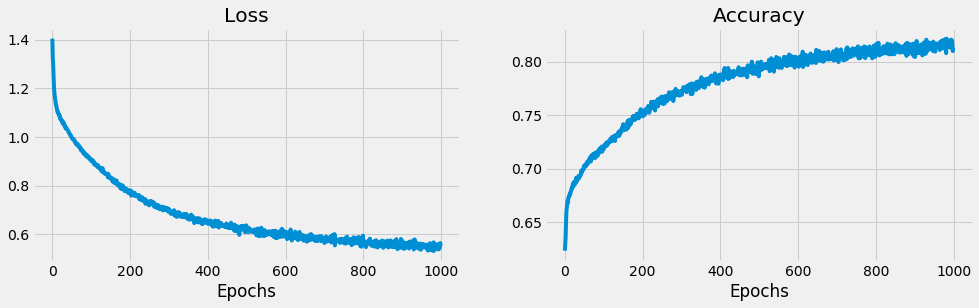

In [951]:
# PLOT MODEL ACCURACY
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2, figsize=(15,4))

ax[0].plot(modelHistory_v1.history['loss'])
ax[0].set_xlabel("Epochs")
ax[0].set_title("Loss")

ax[1].plot(modelHistory_v1.history['accuracy'])
ax[1].set_xlabel("Epochs")
ax[1].set_title("Accuracy")

## Quantifying the Model

In [952]:
model_loss, model_accuracy = fire_cause_model_v1.evaluate(X_test, y_test_categorical, verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

121/121 - 0s - loss: 1.9030 - accuracy: 0.6668
Loss: 1.9029875993728638, Accuracy: 0.6668388247489929


In [953]:
### Making Predictions with new data
# new_data = X_scaler.transform(np.array([[-1.2, 0.3, 0.4]]))
new_data = X_test

print(f"Model output: {fire_cause_model_v1.predict(new_data)}")
print(f"Predicted class: {np.argmax(fire_cause_model_v1.predict(new_data))}")

Model output: [[7.35844587e-05 6.73302591e-01 8.66867310e-07 ... 1.02117576e-06
  3.02136641e-07 1.29856080e-14]
 [6.24579457e-07 2.51035144e-05 4.93140294e-12 ... 1.93791316e-09
  7.56815721e-11 1.31831569e-22]
 [9.47224660e-11 1.39018502e-02 1.15985745e-11 ... 3.44555387e-25
  8.64706695e-10 8.91181940e-34]
 ...
 [2.05772537e-07 8.66089482e-03 2.14922391e-09 ... 3.86087231e-06
  4.46821505e-04 1.88410418e-23]
 [2.47729186e-04 4.72087832e-03 4.01448697e-09 ... 3.96922178e-06
  2.71207397e-03 5.04158372e-15]
 [3.66232347e-14 3.41046997e-03 7.43260400e-15 ... 1.37042398e-19
  5.54338736e-12 1.41215247e-34]]
Predicted class: 4046


In [954]:
### View prediction probabilities
predictions_v1 = np.argmax(fire_cause_model_v1.predict(X_test), axis=1)
probs_v1 = fire_cause_model_v1.predict(X_test)

# Change the shape of y
old_y_test = y_test
new_y_test = np.array(old_y_test)
y_test = new_y_test.reshape(-1, 1) 
y_test
y_test_df = y_test.ravel()
y_test_df


pred_df = pd.DataFrame({
    "Predictions_v1": predictions_v1,
    "Actual": y_test_df, 
    "P(0) model1": np.round(probs_v1[:, 0], 5),
    "P(100) model1": np.round(probs_v1[:, 1], 5),
    })

pred_df.head(50)

,Predictions_v1,Actual,P(0) model1,P(100) model1
0,1,4,0.00007,0.67330
1,6,6,0.00000,0.00003
2,6,6,0.00000,0.01390
3,6,6,0.00000,0.00425
4,7,4,0.00000,0.00000
5,6,6,0.00284,0.00000
6,6,6,0.00000,0.02912
7,6,6,0.00000,0.00004
8,6,6,0.00398,0.00107
9,6,6,0.00014,0.00181


### Saving the model

In [955]:
# SAVING MODEL
# save your model by updating "your_name" with your name
# and "your_model" with your model variable
# be sure to turn this in to BCS
# if joblib fails to import, try running the command to install in terminal/git-bash
import pickle

with open('NN_fireCauseModel.pkl','wb') as f:
    pickle.dump(fire_cause_model_v1, f)


import joblib
filename = 'NN_fireCauseModel.sav'
joblib.dump(fire_cause_model_v1, filename)


TypeError: can't pickle weakref objects